In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
 cd /content/drive/My Drive/GeoIQ

/content/drive/My Drive/GeoIQ


In [3]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
dataset =pd.read_csv('singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual (1).csv')

In [5]:
print('Shape of the dataset is',dataset.shape)

Shape of the dataset is (20460, 4)


In [6]:
dataset.head(3)

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280


In [7]:
dataset.isna().sum()

year       0
level_1    0
level_2    0
value      0
dtype: int64



*   No missing values are found



In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20460 non-null  int64 
 1   level_1  20460 non-null  object
 2   level_2  20460 non-null  object
 3   value    20460 non-null  object
dtypes: int64(1), object(3)
memory usage: 639.5+ KB




*   The column value is considered as Object type by the dataset. It must be converted to int in order not to face hurdles further.



In [9]:
 dataset['value'].describe()

count     20460
unique    12216
top          na
freq       2460
Name: value, dtype: object



*   Around 2460 of the total values are not available and are marked as 'na'.




In [10]:
dataset['value'].isna().sum()

0

In [11]:
dataset[dataset['value'] == 'na']['year'].unique()

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])



*   In these years, some of the values of the feature 'Value' are na.



In [12]:
dataset[dataset['value'] == 'na']['level_1'].unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)



*   All ethnic groups are having some of the 'na's in their feature 'value'.



In [13]:
dataset[dataset['value'] == 'na']['level_2'].unique()

array(['70 - 74 Years', '75 - 79 Years', '80 - 84 Years',
       '75 Years & Over', '80 Years & Over', '85 Years & Over'],
      dtype=object)



*   These age groups are having 'na' s in the feature value.



In [14]:
dataset['value'][dataset['value'] == 'na'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.




*   Removing the rows containing 'na's is not a good idea as we loose necessary information. Imputation techniques are also not helpful here. Replacing 'na' s with zero is considered better.



In [15]:
#Converting datatype of value to int. 
dataset['value'] = dataset['value'].astype(int)

In [16]:
#basic stats
dataset.describe()

,year,value
count,20460.000000,20460.000000
mean,1987.500000,37570.968231
std,17.895968,60072.250172
min,1957.000000,0.000000
25%,1972.000000,1335.750000
50%,1987.500000,9522.000000
75%,2003.000000,45767.000000
max,2018.000000,547854.000000


In [17]:
dataset.head(3)

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280


In [18]:
len(dataset['level_1'].unique())

15

In [19]:
dataset['level_1'].unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [20]:
len(dataset['level_2'].unique())

22

In [21]:
dataset['level_2'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '65 Years & Over', '70 Years & Over',
       '75 Years & Over', '80 Years & Over', '85 Years & Over'],
      dtype=object)

In [22]:
len(dataset['year'].unique())

62

In [23]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Residents'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727


In [24]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Male Residents'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
22,1957,Total Male Residents,0 - 4 Years,136712


In [25]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Female Residents'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
44,1957,Total Female Residents,0 - 4 Years,128015


In [26]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Malays'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
66,1957,Total Malays,0 - 4 Years,43161


In [27]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Chinese'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
132,1957,Total Chinese,0 - 4 Years,197758


In [28]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Total Indians'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
198,1957,Total Indians,0 - 4 Years,18843


In [29]:
dataset[dataset['year']== 1957][dataset['level_1']== 'Other Ethnic Groups (Total)'][dataset['level_2'] == '0  -  4 Years']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
264,1957,Other Ethnic Groups (Total),0 - 4 Years,4965


#1. Identify the largest Ethnic group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [30]:
dataset.loc[dataset['year'] == 1957][dataset['level_1'] == 'Total Chinese']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
132,1957,Total Chinese,0 - 4 Years,197758
133,1957,Total Chinese,5 - 9 Years,170174
134,1957,Total Chinese,10 - 14 Years,109703
135,1957,Total Chinese,15 - 19 Years,107156
136,1957,Total Chinese,20 - 24 Years,85913
137,1957,Total Chinese,25 - 29 Years,76611
138,1957,Total Chinese,30 - 34 Years,59344
139,1957,Total Chinese,35 - 39 Years,55917
140,1957,Total Chinese,40 - 44 Years,57277
141,1957,Total Chinese,45 - 49 Years,51888


*   Summing up all the age groups to calculate population is not a good idea. Because some age groups like '65 years and over' is just the summation of age groups '65 - 69 Years' , '70 - 74 Years','75 - 79 Years', '80 - 84 Years' and '85 Years and Over'.

In [31]:
dataset['level_2'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '65 Years & Over', '70 Years & Over',
       '75 Years & Over', '80 Years & Over', '85 Years & Over'],
      dtype=object)

In [32]:
#Considering a subset of age group to calculate population
age_groups = ['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years',  '85 Years & Over']

In [33]:
dataset.loc[dataset['year'] == 1957][dataset['level_1'] == 'Total Chinese'][dataset['level_2'].isin(age_groups)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,year,level_1,level_2,value
132,1957,Total Chinese,0 - 4 Years,197758
133,1957,Total Chinese,5 - 9 Years,170174
134,1957,Total Chinese,10 - 14 Years,109703
135,1957,Total Chinese,15 - 19 Years,107156
136,1957,Total Chinese,20 - 24 Years,85913
137,1957,Total Chinese,25 - 29 Years,76611
138,1957,Total Chinese,30 - 34 Years,59344
139,1957,Total Chinese,35 - 39 Years,55917
140,1957,Total Chinese,40 - 44 Years,57277
141,1957,Total Chinese,45 - 49 Years,51888


In [34]:
from tqdm import tqdm

In [35]:
years =  [x for x in range(1957,2019,1)]
ethnic_data = pd.DataFrame(columns = ['Year', 'Chinese' , 'Malays' , 'Indians', 'Others','Total'])
for year in tqdm(years):
  ch = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Chinese'][dataset['level_2'].isin(age_groups)].sum()
  ma = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Malays'][dataset['level_2'].isin(age_groups)].sum()
  ind = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Indians'][dataset['level_2'].isin(age_groups)].sum()
  oth = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Other Ethnic Groups (Total)'][dataset['level_2'].isin(age_groups)].sum()
  tot = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Residents'][dataset['level_2'].isin(age_groups)].sum()
  ethnic_data = ethnic_data.append({'Year':year,'Chinese':ch,'Malays':ma,'Indians':ind,'Others':oth,'Total':tot},ignore_index = True)


100%|██████████| 62/62 [00:01<00:00, 43.58it/s]


In [36]:
ethnic_data.head()[0:20]

,Year,Chinese,Malays,Indians,Others,Total
0,1957,1090596,197059,124084,34190,1445929
1,1958,1135800,207200,130800,28400,1502200
2,1959,1189900,218900,131300,29200,1569300
3,1960,1235400,230400,132800,28700,1627300
4,1961,1278200,240700,135200,28500,1682600


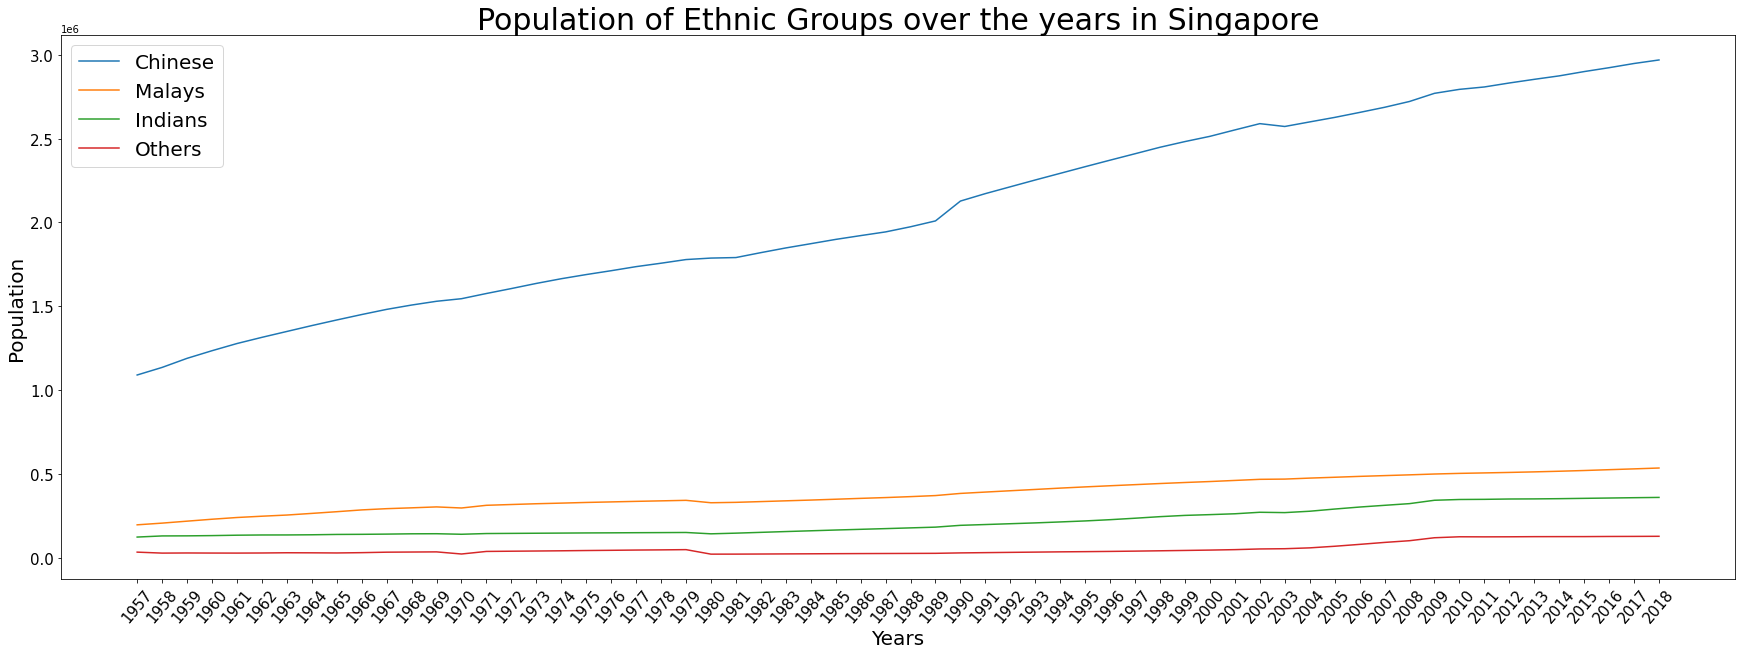

In [37]:
#line plot
ind = np.arange(62)
plt.figure(figsize=(30,10))
line1 = ethnic_data['Chinese']
line2 = ethnic_data['Malays']
line3 = ethnic_data['Indians']
line4 = ethnic_data['Others']

p1 = plt.plot(ind, line1)
p2 = plt.plot(ind, line2)
p3 = plt.plot(ind, line3)
p4 = plt.plot(ind, line4)

plt.title('Population of Ethnic Groups over the years in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Population',fontsize = 20)

plt.tick_params(labelsize=15)
plt.xticks(ind, years,rotation = 50)
plt.yscale('linear')
plt.legend((p1[0], p2[0],p3[0], p4[0]), ('Chinese', 'Malays','Indians','Others'),fontsize = 20)
plt.show()



*   From the above figure it is clear that Chinese are the largest ethnic group in Singapore




In [38]:
years =  [x for x in range(1957,2019,1)]
chinese_total_data = pd.DataFrame(columns = ['Year', 'Total Chinese' , 'Proportion in total population' , 'Growth from last year', 'Growth rate','Total population'])
for year in tqdm(years):
  if (year == 1957):
    ch = ethnic_data['Chinese'].loc[ethnic_data['Year'] == 1957].item()
    prop = ch/(ethnic_data['Total'].loc[ethnic_data['Year'] == 1957].item())
    growth = 0
    growth_rate = 0
    tot = ethnic_data['Total'].loc[ethnic_data['Year'] == 1957].item()
    chinese_total_data = chinese_total_data.append({'Year':year,'Total Chinese':ch,'Proportion in total population':prop,'Growth from last year':growth,'Growth rate':growth_rate,'Total population':tot},ignore_index = True)
 
  else:
    ch = ethnic_data['Chinese'].loc[ethnic_data['Year'] == year].item()
    prop = ch/(ethnic_data['Total'].loc[ethnic_data['Year'] == year].item())
    growth = ethnic_data['Chinese'].loc[ethnic_data['Year'] == year].item() - ethnic_data['Chinese'].loc[ethnic_data['Year'] == year-1].item()
    growth_rate = growth/ ethnic_data['Chinese'].loc[ethnic_data['Year'] == year-1].item()
    tot = ethnic_data['Total'].loc[ethnic_data['Year'] == year].item()
    chinese_total_data = chinese_total_data.append({'Year':year,'Total Chinese':ch,'Proportion in total population':prop,'Growth from last year':growth,'Growth rate':growth_rate,'Total population':tot},ignore_index = True)
 


100%|██████████| 62/62 [00:00<00:00, 245.42it/s]


In [39]:
chinese_total_data.head()

,Year,Total Chinese,Proportion in total population,Growth from last year,Growth rate,Total population
0,1957.0,1090596.0,0.754253,0.0,0.000000,1445929.0
1,1958.0,1135800.0,0.756091,45204.0,0.041449,1502200.0
2,1959.0,1189900.0,0.758236,54100.0,0.047632,1569300.0
3,1960.0,1235400.0,0.759172,45500.0,0.038239,1627300.0
4,1961.0,1278200.0,0.759658,42800.0,0.034645,1682600.0


In [40]:
avg_growth = (chinese_total_data['Growth from last year'][1:]).sum()/61

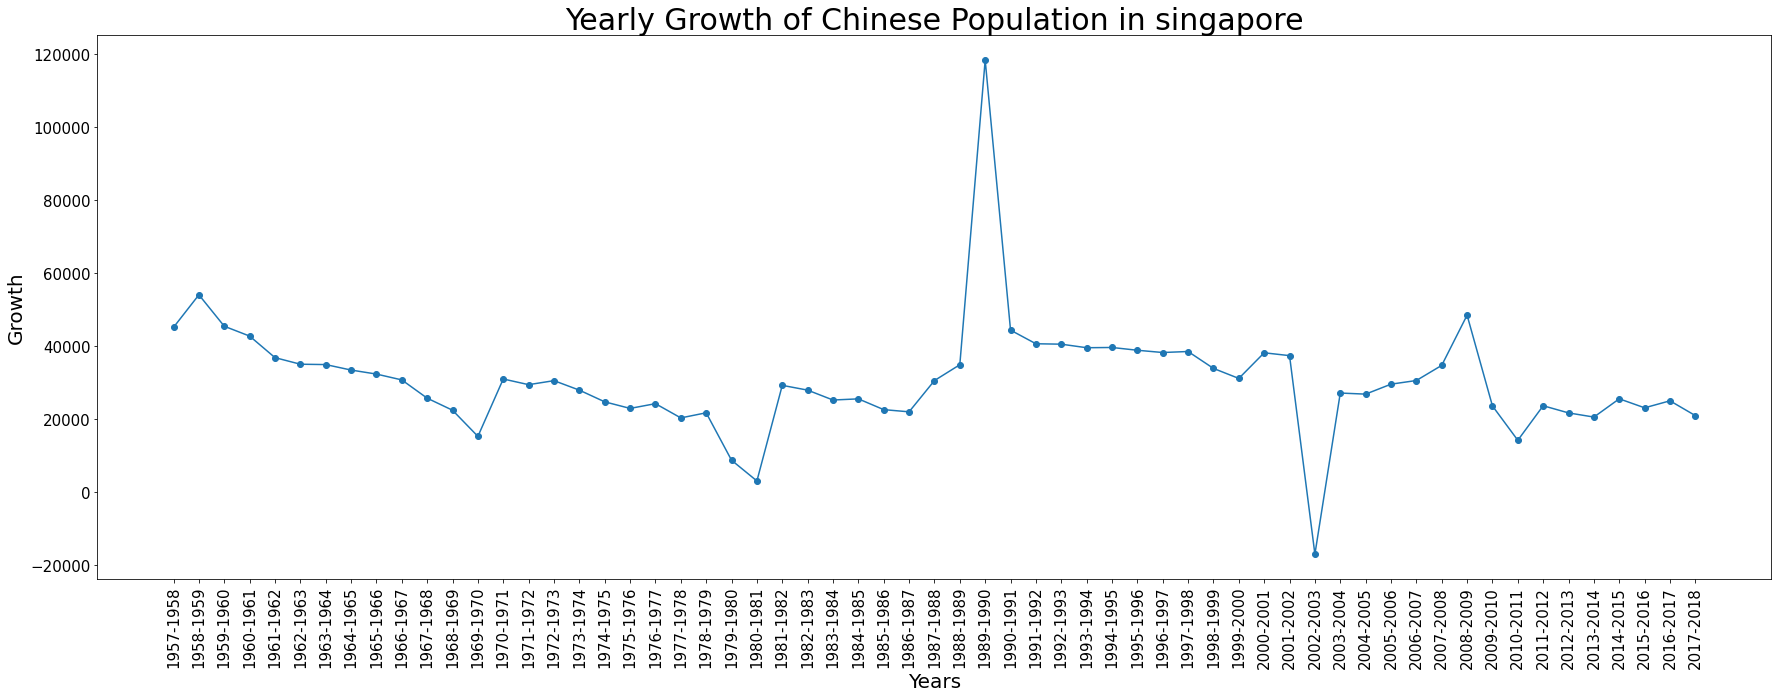


			 On an average the population growth of Chinese over the years is 30798.11


In [41]:
ticks = []
for year in years:
  tick = str(year) + '-' + str(year+1)
  ticks.append(tick)

ind = np.arange(61)
plt.figure(figsize=(30,10))
line1 = chinese_total_data['Growth from last year'][1:]

p1 = plt.plot(ind, line1)
p2 = plt.scatter(ind,line1)

plt.title('Yearly Growth of Chinese Population in singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Growth',fontsize = 20)

plt.tick_params(labelsize=15)
plt.xticks(ind, ticks[:-1],rotation = 90)
plt.yscale('linear')
plt.show()

print('\n\t\t\t On an average the population growth of Chinese over the years is {:.2f}'.format(avg_growth)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


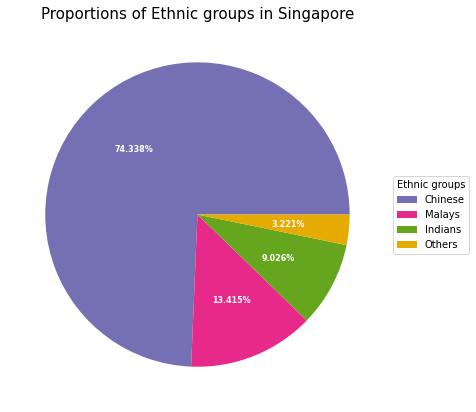

In 2018, the proportion of Chinese population in Singapore is 0.743
The percentage of chinese populations in 2018 is 74.338%


In [42]:
ch = ethnic_data['Chinese'][ethnic_data['Year']==2018].values
ma = ethnic_data['Malays'][ethnic_data['Year']==2018].values
indn = ethnic_data['Indians'][ethnic_data['Year']==2018].values
oth = ethnic_data['Others'][ethnic_data['Year']==2018].values
tot = ethnic_data['Total'][ethnic_data['Year']==2018].values
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))
data = [ch , ma , indn , oth]
ind = ['Chinese' , 'Malays' , 'Indians' , 'Others']
cmap = plt.get_cmap("Dark2")  
inner_colors = cmap(np.array([2,3,4,5]))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.3f}%".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data,autopct=lambda pct: func(pct, data), textprops=dict(color="w"),colors = inner_colors)

ax.legend(wedges, ind,
          title="Ethnic groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Proportions of Ethnic groups in Singapore", fontsize =15)
plt.show()

print('In 2018, the proportion of Chinese population in Singapore is {:.3f}'.format(float(ch/tot)))
print('The percentage of chinese populations in 2018 is {:.3f}%'.format(float(ch/tot)*100))

#2. Identify the largest age group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [43]:
age_list = []
lst = []
cols = list(dataset['level_2'].unique())
cols.insert(0, "Year") 
age_data_total = pd.DataFrame(columns = cols)
for year in tqdm(years):
  lst = []
  lst.append(year)
  for col in cols[1:]:
    temp = dataset['value'][dataset['level_1'] == 'Total Residents'][dataset['level_2'] == col][dataset['year'] == year].item()
    lst.append(temp)
  age_list.append(dict(zip(cols, lst)))

100%|██████████| 62/62 [00:05<00:00, 10.45it/s]


In [44]:
age_data_total = age_data_total.append(age_list)
age_data_total.head()

,Year,0 - 4 Years,5 - 9 Years,10 - 14 Years,15 - 19 Years,20 - 24 Years,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 - 69 Years,70 - 74 Years,75 - 79 Years,80 - 84 Years,65 Years & Over,70 Years & Over,75 Years & Over,80 Years & Over,85 Years & Over
0,1957,264727,218097,136280,135679,119266,111726,89925,82709,76217,66716,51794,37456,24276,15399,8774,4225,1786,31061,15662,6888,2663,877
1,1958,277800,229600,157100,134300,124900,114700,95100,84300,77500,69300,54200,40400,25900,17100,0,0,0,33700,16600,0,0,0
2,1959,288800,241000,175700,131500,133100,115100,102100,85200,79100,72400,57300,42900,27300,17800,0,0,0,35700,17900,0,0,0
3,1960,297000,250300,200300,124700,139500,116200,106600,86400,80500,74400,59600,44700,28700,18400,0,0,0,37500,19100,0,0,0
4,1961,303700,258900,217400,124900,142500,119600,112300,86200,83100,74300,62600,45900,32200,19000,0,0,0,38800,19800,0,0,0


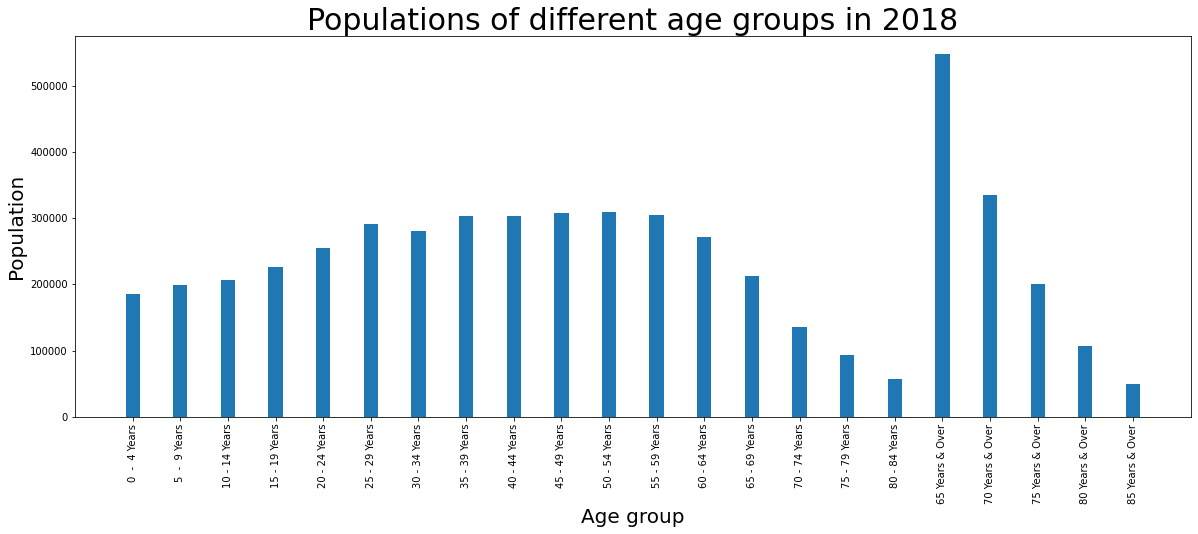

In [45]:
#bar plot of age groups in 2018
plt.figure(figsize=(20,7))
ind = np.arange(22)
x = age_data_total.iloc[61][cols[1:]].values[0:]
plt.bar(ind,x ,width = 0.3)
plt.title('Populations of different age groups in 2018',fontsize = 30)
plt.xlabel('Age group',fontsize = 20)
plt.ylabel('Population',fontsize = 20)

plt.tick_params(labelsize=10)
plt.xticks(ind, cols[1:],rotation = 90)
plt.yscale('linear')
plt.show()



*   Clearly the age group '65 Years and Over' is the largest age in 2018 in Singapore.



In [46]:
df_age_65 = pd.DataFrame(dataset[['year','value']].loc[dataset['level_1'] == 'Total Residents'][dataset['level_2']=='65 Years & Over'].values,columns = ('Year','Value'))
df_age_65.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Year,Value
0,1957,31061
1,1958,33700
2,1959,35700
3,1960,37500
4,1961,38800


In [47]:
temp = []
for year in years[1:]:
  temp.append(df_age_65['Value'][df_age_65['Year']== year].values - df_age_65['Value'][df_age_65['Year']== year-1].values)

temp2 = []
for year in years:
  temp3 = dataset['value'].loc[dataset['level_1'] == 'Total Residents'][dataset['level_2']== '65 Years & Over'][dataset['year']== year].values
  temp4 = dataset['value'].loc[dataset['level_1'] == 'Total Residents'][dataset['year']== year][dataset['level_2'].isin(age_groups)].values.sum()
  temp2.append(temp3/temp4)

temp.insert(0,np.array([0]))

In [48]:
print(len(temp))
print(len(temp2))

62
62


In [49]:
df_age_65['Growth from last year'] = np.array(temp)
df_age_65['proportion'] = np.array(temp2)
df_age_65.head()

,Year,Value,Growth from last year,proportion
0,1957,31061,0,0.021482
1,1958,33700,2639,0.022434
2,1959,35700,2000,0.022749
3,1960,37500,1800,0.023044
4,1961,38800,1300,0.023060


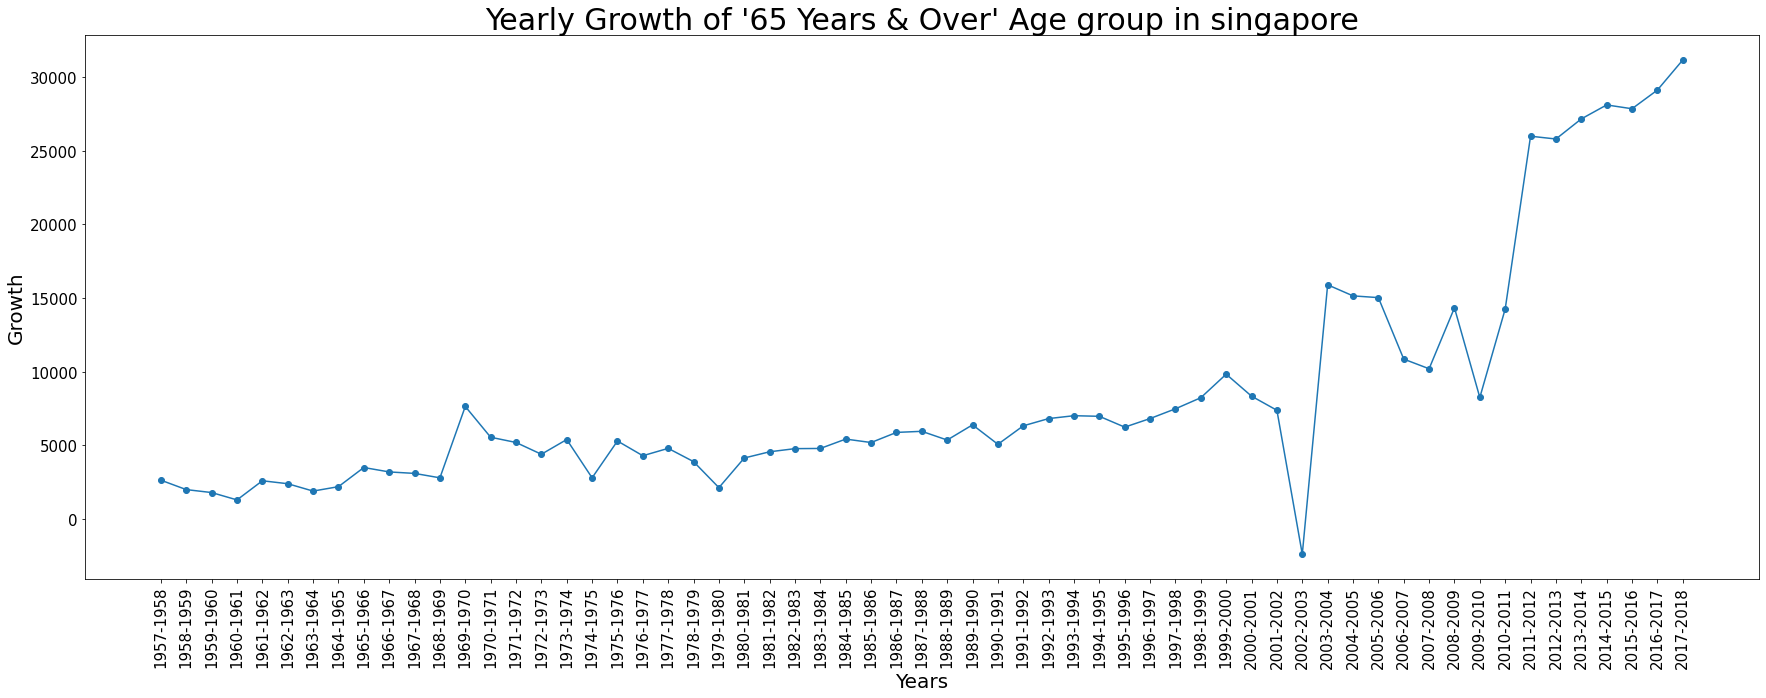


			 On an average the population growth of '65 Years & Over' age group over the years is 8472.02


In [50]:
avg_growth_65 = (df_age_65['Growth from last year'][1:]).sum()/61
ticks = []
for year in years:
  tick = str(year) + '-' + str(year+1)
  ticks.append(tick)

ind = np.arange(61)
plt.figure(figsize=(30,10))
line1 = df_age_65['Growth from last year'][1:]

p1 = plt.plot(ind, line1)
p2 = plt.scatter(ind,line1)

plt.title('Yearly Growth of \'65 Years & Over\' Age group in singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Growth',fontsize = 20)

plt.tick_params(labelsize=15)
plt.xticks(ind, ticks[:-1],rotation = 90)
plt.yscale('linear')
plt.show()

print('\n\t\t\t On an average the population growth of \'65 Years & Over\' age group over the years is {:.2f}'.format(avg_growth_65)) 



*   The average population growth of the age group '65 Years & Over' is 8472.02.



In [51]:
print('In 2018 the \'65 years and over\' age group contributed for {:.4f} proportion i.e. {:.4f}% of entire population'.format(df_age_65['proportion'][df_age_65['Year'] == 2018].item(),df_age_65['proportion'][df_age_65['Year'] == 2018].item()*100))

In 2018 the '65 years and over' age group contributed for 0.1372 proportion i.e. 13.7160% of entire population


#3. Identify the group (by age, ethnicity and gender) that:


*   a. Has shown the highest growth rate
*   b. Has shown the lowest growth rate
*   c. Has remained the same


##3.1 Age

In [52]:
# Growth rate = ((Present population - Past population)/Present population)/Number of years between them

age_gr = []
age_gr_list = []
cols = list(dataset['level_2'].unique())
for col in cols:
  temp1 = dataset['value'][dataset['level_1'] == 'Total Residents'][dataset['level_2'] == col][dataset['year'] == 1957].item()
  temp2 = dataset['value'][dataset['level_1'] == 'Total Residents'][dataset['level_2'] == col][dataset['year'] == 2018].item()
  temp3 = ((temp2-temp1)/temp1)/62
  age_gr.append(temp3)
age_gr_list.append(dict(zip(cols, age_gr)))
print('The growth rates of various age groups over the years')
age_gr_list

The growth rates of various age groups over the years


[{'0  -  4 Years': -0.004825360563170556,
  '10 - 14 Years': 0.00831423918497969,
  '15 - 19 Years': 0.010798851844094065,
  '20 - 24 Years': 0.018425876990603277,
  '25 - 29 Years': 0.025971515568328742,
  '30 - 34 Years': 0.03434259732572843,
  '35 - 39 Years': 0.043099221951505846,
  '40 - 44 Years': 0.04812722756374308,
  '45 - 49 Years': 0.05829283104696074,
  '5  -  9 Years': -0.001407408689267738,
  '50 - 54 Years': 0.08008493946863941,
  '55 - 59 Years': 0.11494519160546224,
  '60 - 64 Years': 0.16438112246796252,
  '65 - 69 Years': 0.20602720327461566,
  '65 Years & Over': 0.2683548812897826,
  '70 - 74 Years': 0.23304190533614713,
  '70 Years & Over': 0.32963593822731,
  '75 - 79 Years': 0.34014888337468985,
  '75 Years & Over': 0.45267833726724366,
  '80 - 84 Years': 0.4995574901564137,
  '80 Years & Over': 0.6312126754933195,
  '85 Years & Over': 0.8993268841725824}]



*   The highest growth rate is observed in '85 Years and Over' age group and the rate is 0.89933.
*   The lowest growth rate is observed in '0 - 4 Years' age group and the rate is -0.00482.
*   No age groups have remained same i.e. Every age group's growth rate is not equal to zero.






##3.2 Ethnicity

In [53]:
ethnic_data.head()

,Year,Chinese,Malays,Indians,Others,Total
0,1957,1090596,197059,124084,34190,1445929
1,1958,1135800,207200,130800,28400,1502200
2,1959,1189900,218900,131300,29200,1569300
3,1960,1235400,230400,132800,28700,1627300
4,1961,1278200,240700,135200,28500,1682600


In [54]:
ethnic_gr = []
ethnic_gr_list = []
cols = ['Chinese' , 'Malays' , 'Indians' , 'Others']
for col in cols:
  temp1 = ethnic_data[col].loc[ethnic_data['Year'] == 1957].item()
  temp2 = ethnic_data[col].loc[ethnic_data['Year'] == 2018].item()
  temp3 = ((temp2-temp1)/temp1)/62
  ethnic_gr.append(temp3)
ethnic_gr_list.append(dict(zip(cols, ethnic_gr)))
print('The growth rates of various Ethnic groups over the years')
ethnic_gr_list

The growth rates of various Ethnic groups over the years


[{'Chinese': 0.02778423079466818,
  'Indians': 0.030734122878258326,
  'Malays': 0.027727490816979818,
  'Others': 0.044561228051967654}]



*   The highest growth rate is observed in 'Other Ethnic groups' and the rate is 0.04456
*   The lowest growth rate is observed in 'Malays' age group and the rate is 0.02772
*   No Ethnic groups have remained same i.e. Every ethnic group's growth rate is not equal to zero






##3.3 Gender

In [55]:
age_groups = ['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years',  '85 Years & Over']

In [56]:
gender_list = []
lst = []
cols = ['Year','Total Male Residents','Total Female Residents'] 
gender_data_total = pd.DataFrame(columns = cols)
for year in tqdm(years):
  lst= []
  lst.append(year)
  for col in cols[1:]:
    temp = dataset['value'][dataset['level_1'] == col][dataset['level_2'].isin(age_groups)][dataset['year'] == year].values.sum()
    lst.append(temp)
  gender_list.append(dict(zip(cols, lst)))
gender_data_total = gender_data_total.append(gender_list)
gender_data_total.head()

100%|██████████| 62/62 [00:00<00:00, 116.78it/s]


,Year,Total Male Residents,Total Female Residents
0,1957,762760,683169
1,1958,792100,710100
2,1959,824500,744800
3,1960,853100,774200
4,1961,879600,803000


In [57]:
gender_gr = []
gender_gr_list = []
cols = ['Total Male Residents' , 'Total Female Residents']
for col in cols:
  temp1 = gender_data_total[col].loc[gender_data_total['Year'] == 1957].item()
  temp2 = gender_data_total[col].loc[gender_data_total['Year'] == 2018].item()
  temp3 = ((temp2-temp1)/temp1)/62
  gender_gr.append(temp3)
gender_gr_list.append(dict(zip(cols, gender_gr)))
print('The growth rates of various Genders over the years')
gender_gr_list

The growth rates of various Genders over the years


[{'Total Female Residents': 0.03199690021441349,
  'Total Male Residents': 0.025228372683920367}]



*   The highest growth rate is observed in Females and the rate is 0.03200
*   The lowest growth rate is observed in Males and the rate is 0.02523
*   No gender has remained same i.e Every gender's growth rate is not equal to zero 





#4.Plot a graph for population trends

## Trends of Populations of Males and Females in Singapore

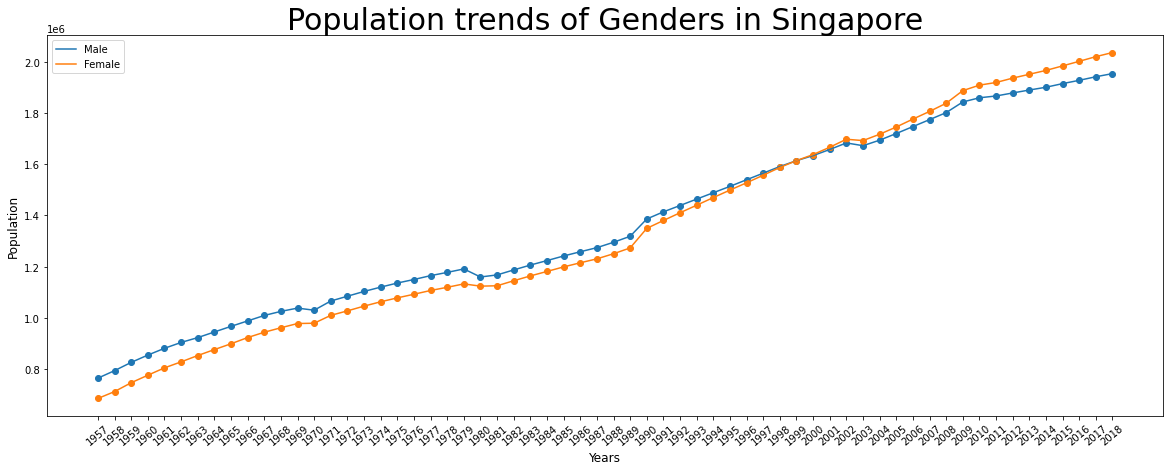

In [58]:
ind = np.arange(62)
plt.figure(figsize=(20,7))
line1 = gender_data_total['Total Male Residents'].values
line2 = gender_data_total['Total Female Residents'].values

p1 = plt.plot(ind, line1)
p2 = plt.scatter(ind,line1)
p3 = plt.plot(ind, line2)
p4 = plt.scatter(ind,line2)

plt.title('Population trends of Genders in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Population',fontsize = 12)

plt.tick_params(labelsize=10)
plt.xticks(ind, years,rotation = 40)
plt.yscale('linear')
plt.legend((p1[0],p3[0]),('Male','Female'))
plt.show()



*   In the year 1999 Female population has surpassed Male population in Singapore



#Other Trends

In [59]:
chinese_data = pd.DataFrame(columns = ['Year', 'Total Chinese' , 'Total Male Chinese' , 'Total Female Chinese'])
for year in tqdm(years):
  ch = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Chinese'][dataset['level_2'].isin(age_groups)].sum()
  ma = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Male Chinese'][dataset['level_2'].isin(age_groups)].sum()
  fem = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Female Chinese'][dataset['level_2'].isin(age_groups)].sum()
  chinese_data = chinese_data.append({'Year':year,'Total Chinese':ch,'Total Male Chinese':ma,'Total Female Chinese':fem},ignore_index = True)
chinese_data.head()

100%|██████████| 62/62 [00:01<00:00, 59.94it/s]


,Year,Total Chinese,Total Male Chinese,Total Female Chinese
0,1957,1090596,555663,534933
1,1958,1135800,580800,555000
2,1959,1189900,607700,582200
3,1960,1235400,630900,604500
4,1961,1278200,652300,625900


In [60]:
Malays_data = pd.DataFrame(columns = ['Year', 'Total Malays' , 'Total Male Malays' , 'Total Female Malays'])
for year in tqdm(years):
  ch = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Malays'][dataset['level_2'].isin(age_groups)].sum()
  ma = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Male Malays'][dataset['level_2'].isin(age_groups)].sum()
  fem = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Female Malays'][dataset['level_2'].isin(age_groups)].sum()
  Malays_data = Malays_data.append({'Year':year,'Total Malays':ch,'Total Male Malays':ma,'Total Female Malays':fem},ignore_index = True)
Malays_data.head()

100%|██████████| 62/62 [00:00<00:00, 67.44it/s]


,Year,Total Malays,Total Male Malays,Total Female Malays
0,1957,197059,103249,93810
1,1958,207200,108300,98900
2,1959,218900,114400,104500
3,1960,230400,120200,110200
4,1961,240700,124800,115900


In [61]:
Indians_data = pd.DataFrame(columns = ['Year', 'Total Indians' , 'Total Male Indians' , 'Total Female Indians'])
for year in tqdm(years):
  ch = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Indians'][dataset['level_2'].isin(age_groups)].sum()
  ma = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Male Indians'][dataset['level_2'].isin(age_groups)].sum()
  fem = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Total Female Indians'][dataset['level_2'].isin(age_groups)].sum()
  Indians_data = Indians_data.append({'Year':year,'Total Indians':ch,'Total Male Indians':ma,'Total Female Indians':fem},ignore_index = True)
Indians_data.head()

100%|██████████| 62/62 [00:00<00:00, 64.76it/s]


,Year,Total Indians,Total Male Indians,Total Female Indians
0,1957,124084,85988,38096
1,1958,130800,88700,42100
2,1959,131300,87700,43600
3,1960,132800,87700,45100
4,1961,135200,88400,46800


In [62]:
Others_data = pd.DataFrame(columns = ['Year', 'Other Ethnic Groups (Total)' , 'Other Ethnic Groups (Males)' , 'Other Ethnic Groups (Females)'])
for year in tqdm(years):
  ch = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Other Ethnic Groups (Total)'][dataset['level_2'].isin(age_groups)].sum()
  ma = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Other Ethnic Groups (Males)'][dataset['level_2'].isin(age_groups)].sum()
  fem = dataset['value'].loc[dataset['year'] == year][dataset['level_1'] == 'Other Ethnic Groups (Females)'][dataset['level_2'].isin(age_groups)].sum()
  Others_data = Others_data.append({'Year':year,'Other Ethnic Groups (Total)':ch,'Other Ethnic Groups (Males)':ma,'Other Ethnic Groups (Females)':fem},ignore_index = True)
Others_data.head()

100%|██████████| 62/62 [00:00<00:00, 63.20it/s]


,Year,Other Ethnic Groups (Total),Other Ethnic Groups (Males),Other Ethnic Groups (Females)
0,1957,34190,17860,16330
1,1958,28400,14300,14100
2,1959,29200,14700,14500
3,1960,28700,14300,14400
4,1961,28500,14100,14400


##Trend of Chinese Population of Males and Females in Singapore

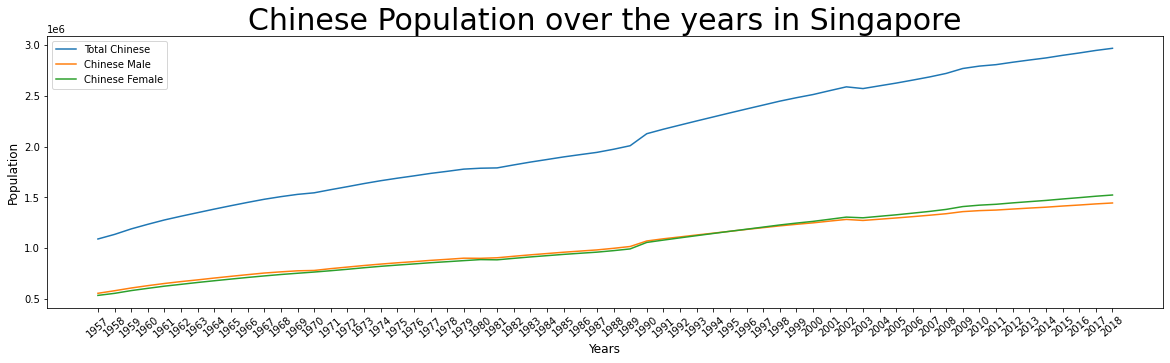

In [63]:
ind = np.arange(62)
plt.figure(figsize=(20,5))
line1 = chinese_data['Total Chinese'].values
line2 = chinese_data['Total Male Chinese'].values
line3 = chinese_data['Total Female Chinese'].values

p1 = plt.plot(ind, line1)
p3 = plt.plot(ind, line2)
p5 = plt.plot(ind, line3)

plt.title('Chinese Population over the years in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Population',fontsize = 12)

plt.tick_params(labelsize=10)
plt.xticks(ind, years,rotation = 40)
plt.yscale('linear')
plt.legend((p1[0],p3[0],p5[0]),('Total Chinese','Chinese Male','Chinese Female'))
plt.show()

##Trend of Malay Population of Males and Females in Singapore

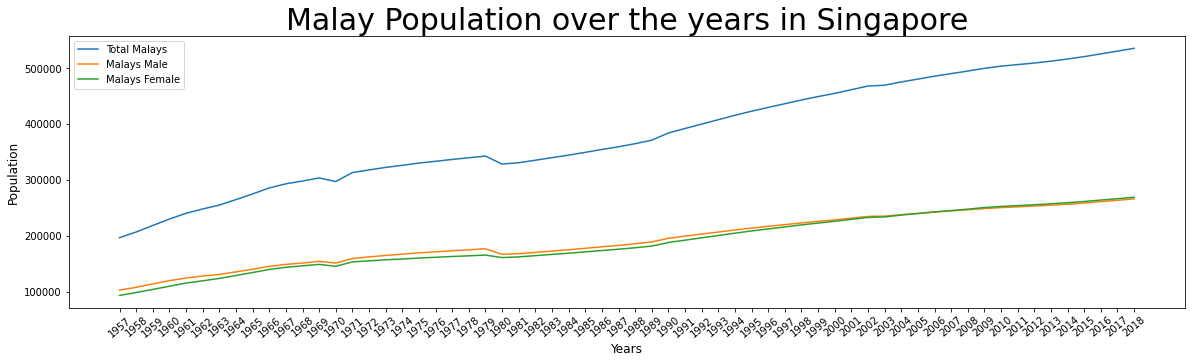

In [64]:
ind = np.arange(62)
plt.figure(figsize=(20,5))
line1 = Malays_data['Total Malays'].values
line2 = Malays_data['Total Male Malays'].values
line3 = Malays_data['Total Female Malays'].values

p1 = plt.plot(ind, line1)
p3 = plt.plot(ind, line2)
p5 = plt.plot(ind, line3)

plt.title('Malay Population over the years in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Population',fontsize = 12)

plt.tick_params(labelsize=10)
plt.xticks(ind, years,rotation = 40)
plt.yscale('linear')
plt.legend((p1[0],p3[0],p5[0]),('Total Malays','Malays Male','Malays Female'))
plt.show()

##Trend of Indian Population of Males and Females in Singapore

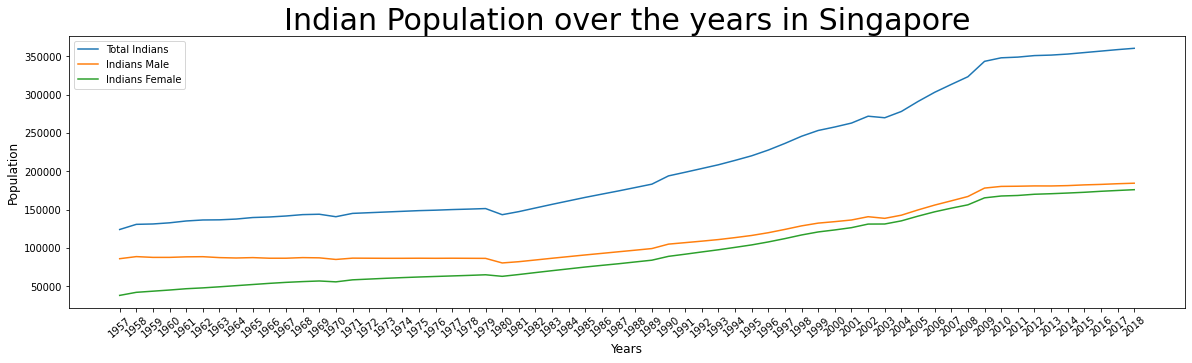

In [65]:
ind = np.arange(62)
plt.figure(figsize=(20,5))
line1 = Indians_data['Total Indians'].values
line2 = Indians_data['Total Male Indians'].values
line3 = Indians_data['Total Female Indians'].values

p1 = plt.plot(ind, line1)
p3 = plt.plot(ind, line2)
p5 = plt.plot(ind, line3)

plt.title('Indian Population over the years in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Population',fontsize = 12)

plt.tick_params(labelsize=10)
plt.xticks(ind, years,rotation = 40)
plt.yscale('linear')
plt.legend((p1[0],p3[0],p5[0]),('Total Indians','Indians Male','Indians Female'))
plt.show()

##Trend of Other ethnic groups in Singapore

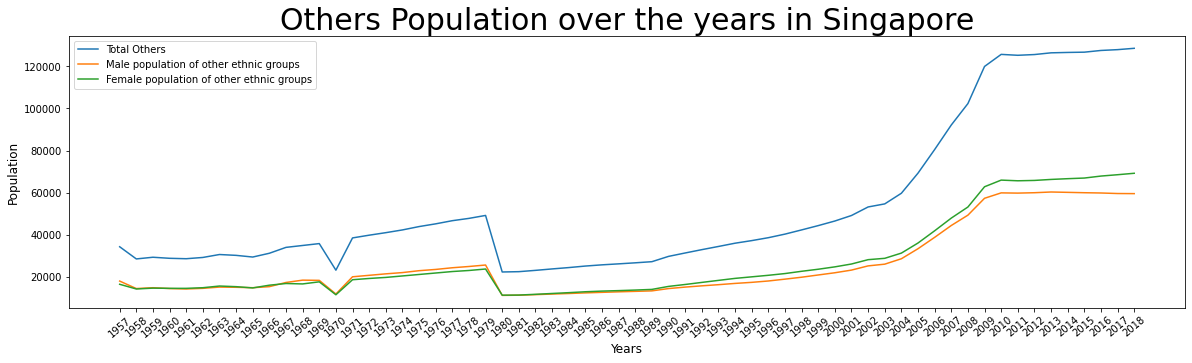

In [66]:
ind = np.arange(62)
plt.figure(figsize=(20,5))
line1 = Others_data['Other Ethnic Groups (Total)'].values
line2 = Others_data['Other Ethnic Groups (Males)'].values
line3 = Others_data['Other Ethnic Groups (Females)'].values

p1 = plt.plot(ind, line1)
p3 = plt.plot(ind, line2)
p5 = plt.plot(ind, line3)

plt.title('Others Population over the years in Singapore',fontsize = 30)
plt.xlabel('Years',fontsize = 12)
plt.ylabel('Population',fontsize = 12)

plt.tick_params(labelsize=10)
plt.xticks(ind, years,rotation = 40)
plt.yscale('linear')
plt.legend((p1[0],p3[0],p5[0]),('Total Others','Male population of other ethnic groups','Female population of other ethnic groups'))
plt.show()

#**Conclusions**
1. *   Chinese are the largest ethnic group in Singapore
   *   The average population growth of Chinese over the years is 30798.11
   *   In 2018, the proportion of Chinese population in Singapore is 0.743


2. *   The age group '65 Years and Over' is the largest age group in 2018 in Singapore.
   *   The average population growth of '65 Years & Over' age group over the years is 8472.02
   *   In 2018 the '65 years and over' age group contributed for 0.1372 proportion i.e. 13.7160% of entire population.

3. 
  Age:
    *  The highest growth rate is observed in '85 Years and Over' age group and the rate is 0.89933.
    *   The lowest growth rate is observed in '0 - 4 Years' age group and the rate is -0.00482.
    *   No age groups have remained same i.e. Every age group's growth rate is not equal to zero.

   Ethnicity: 
   *  The highest growth rate is observed in 'Other Ethnic groups' and the rate is 0.04456
   *  The lowest growth rate is observed in 'Malays' Ethnic group and the rate is 0.02772
   *  No Ethnic groups have remained same i.e. Every ethnic group's growth rate is not equal to zero
   
   Gender:
   *   The highest growth rate is observed in Females and the rate is 0.03200
   *   The lowest growth rate is observed in Males and the rate is 0.02523
   *   No gender has remained same i.e Every gender's growth rate is not equal to zero

4. Some population trends are plotted.

5. Some other insights:
 *   Females are more in number than males in Singapore.
 *   Although '65 years and over' is the largest age group , it is collective of few other age groups. If we consider pure age groups then '50-54 years' is the largest age group in Singapore followed by '45-49 years'.
  *   Indians are the only ethnic group in Singapore with Male population higher than Female population along their entire course over the years.



      



